In [0]:
!ls

cwr_faulty   result_faulty_pandas.csv	sample_data
cwr_healthy  result_healthy_pandas.csv


In [0]:
import pandas as pd
df_healthy = pd.read_csv('result_healthy_pandas.csv', engine='python', header=None)
df_healthy.head()

,0,1,2,3
0,0,97,0.053197,0.145667
1,1,97,0.088662,0.097796
2,2,97,0.099718,0.054856
3,3,97,0.058621,0.036982
4,4,97,-0.004590,0.054445


In [0]:
df_healthy.loc[df_healthy[1] == 100]

,0,1,2,3
243938,243938,100,0.014603,0.192922
243939,243939,100,0.054449,0.164364
243940,243940,100,0.107646,0.090811
243941,243941,100,0.133722,0.086496
243942,243942,100,0.112652,0.099235
243943,243943,100,0.082403,0.093071
243944,243944,100,0.086993,0.081976
243945,243945,100,0.110566,0.033078
243946,243946,100,0.127673,0.011711
243947,243947,100,0.113487,0.022189


In [0]:
import numpy
df_faulty = pd.read_csv('result_faulty_pandas.csv', engine='python', header=None)
print(numpy.shape(df_faulty))
df_faulty.head()

(488309, 4)


,0,1,2,3
0,0,107,-0.093238,-0.029175
1,1,107,0.187288,-0.186347
2,2,107,0.217663,-0.341260
3,3,107,0.070172,-0.160871
4,4,107,0.100385,0.179978


In [0]:
for i,item in enumerate(df_faulty[1]):
  if(i%10000 == 0):
    print (item)

107
107
107
107
107
107
107
107
107
107
107
107
107
105
105
105
105
105
105
105
105
105
105
105
105
106
106
106
106
106
106
106
106
106
106
106
106
108
108
108
108
108
108
108
108
108
108
108
108


In [0]:
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib inline

Using TensorFlow backend.


In [0]:
def get_recording(df,file_id):
    return np.array(df.sort_values(by=0, ascending=True).loc[df[1] == file_id].drop(0,1).drop(1,1))


In [0]:
import numpy as np
healthy_sample = get_recording(df_healthy,100)
faulty_sample = get_recording(df_faulty,105)

In [0]:
import numpy
print(numpy.shape(faulty_sample))

(121265, 2)


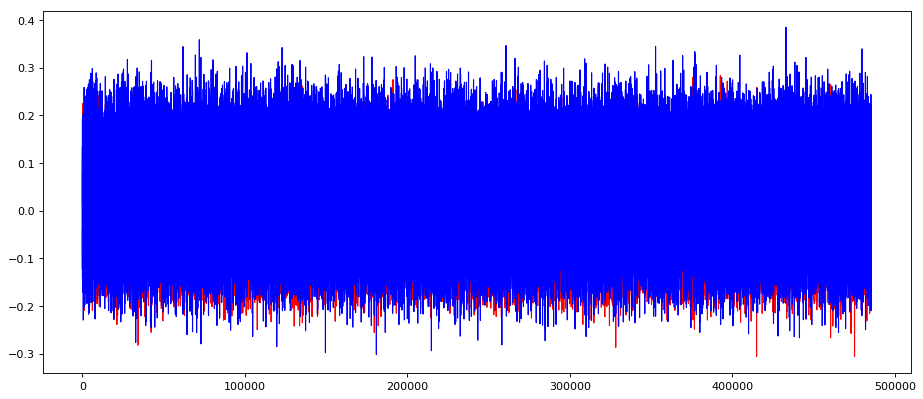

In [0]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(healthy_sample)
ax.plot(range(0,size), healthy_sample[:,0], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), healthy_sample[:,1], '-', color='blue', animated = True, linewidth=1)

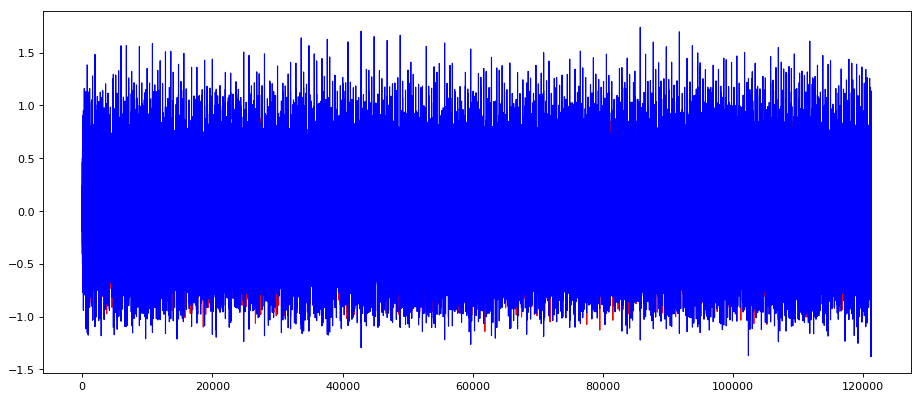

In [0]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(faulty_sample)
ax.plot(range(0,size), faulty_sample[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), faulty_sample[:,0], '-', color='blue', animated = True, linewidth=1)

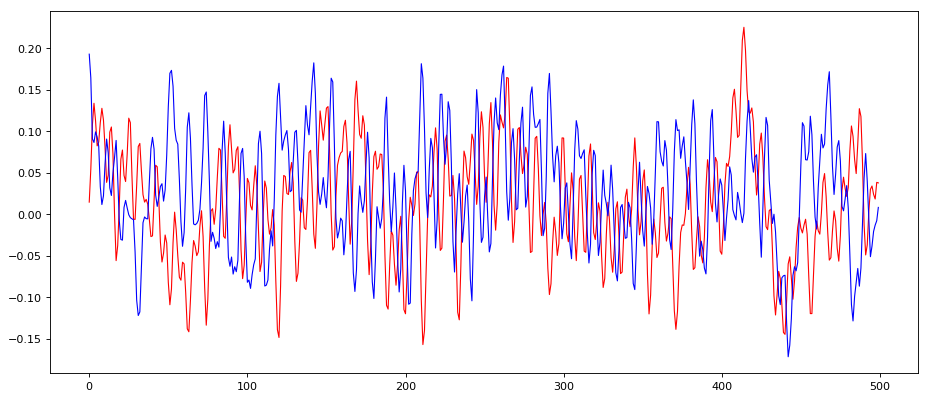

In [0]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
ax.plot(range(0,500), healthy_sample[:500,0], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,500), healthy_sample[:500,1], '-', color='blue', animated = True, linewidth=1)

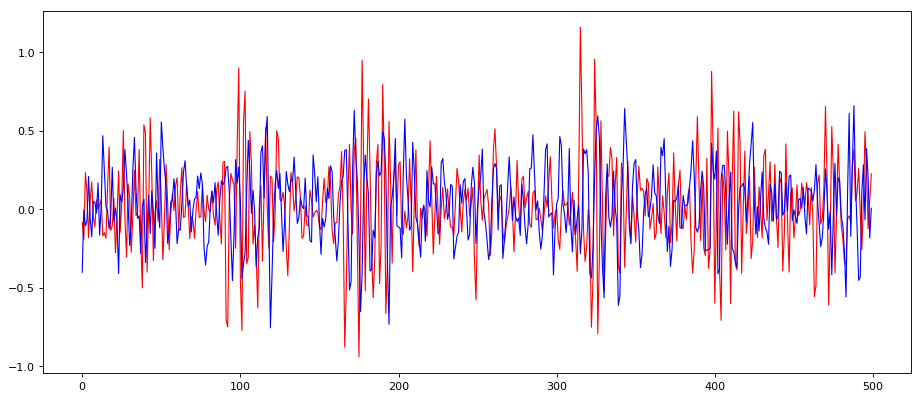

In [0]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
ax.plot(range(0,500), faulty_sample[:500,0], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,500), faulty_sample[:500,1], '-', color='blue', animated = True, linewidth=1)

In [0]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [0]:
timesteps = 100
dim = 2
lossHistory = LossHistory()
# design network

model = Sequential()
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(Dense(2))
model.compile(loss='mae', optimizer='adam')

def train(data):
    model.fit(data, data, epochs=20, batch_size=72, validation_data=(data, data), verbose=1, shuffle=False,callbacks=[lossHistory])

def score(data):
    yhat =  model.predict(data)
    return yhat

W0713 02:09:36.125742 140698987030400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 02:09:36.162513 140698987030400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 02:09:36.168575 140698987030400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 02:09:36.543076 140698987030400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
#some learners constantly reported 502 errors in Watson Studio. 
#This is due to the limited resources in the free tier and the heavy resource consumption of Keras.
#This is a workaround to limit resource consumption

from keras import backend as K

K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))


In [0]:
def create_trimmed_recording(df,file_id):
    recording = get_recording(df,file_id) 
    samples = len(recording)
    trim = samples % 100
    recording_trimmed = recording[:samples-trim]
    recording_trimmed.shape = (int((samples-trim)/timesteps),timesteps,dim)
    return recording_trimmed


In [0]:
#pd.unique()
#df_healthy.drop(0,1).drop(2,1).drop(3,1)
pd.unique(df_healthy.iloc[:,1])

array([ 97, 100,  98])

In [0]:
file_ids = pd.unique(df_healthy.iloc[:,1])
start = time.time()
for file_id in file_ids:
    recording_trimmed = create_trimmed_recording(df_healthy,file_id)
    print("Staring training on %s" % (file_id))
    #train(recording_trimmed)
    model.fit(recording_trimmed, recording_trimmed, epochs=20, batch_size=72, validation_data=(recording_trimmed, recording_trimmed), verbose=1, shuffle=False,callbacks=[lossHistory])
    print("Finished training on %s after %s seconds" % (file_id,time.time()-start))

print("Finished job on after %s seconds" % (time.time()-start))
healthy_losses = lossHistory.losses


W0713 02:10:28.271596 140698987030400 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Staring training on 97


W0713 02:10:28.723610 140698987030400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0713 02:10:28.800335 140698987030400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 2439 samples, validate on 2439 samples
Epoch 1/20
2439/2439 [==============================] - 9s 4ms/step - loss: 0.0596 - val_loss: 0.0530
Epoch 2/20
2439/2439 [==============================] - 6s 2ms/step - loss: 0.0461 - val_loss: 0.0365
Epoch 3/20
2439/2439 [==============================] - 6s 2ms/step - loss: 0.0278 - val_loss: 0.0219
Epoch 4/20
2439/2439 [==============================] - 6s 2ms/step - loss: 0.0178 - val_loss: 0.0143
Epoch 5/20
2439/2439 [==============================] - 6s 2ms/step - loss: 0.0110 - val_loss: 0.0105
Epoch 6/20
2439/2439 [==============================] - 6s 2ms/step - loss: 0.0078 - val_loss: 0.0061
Epoch 7/20
2439/2439 [==============================] - 6s 2ms/step - loss: 0.0062 - val_loss: 0.0057
Epoch 8/20
2439/2439 [==============================] - 6s 2ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 9/20
2439/2439 [==============================] - 6s 2ms/step - loss: 0.0074 - val_loss: 0.0105
Epoch 10/20
2439/2439 [===========

KeyboardInterrupt: ignored

In [0]:
healthy_losses = lossHistory.losses

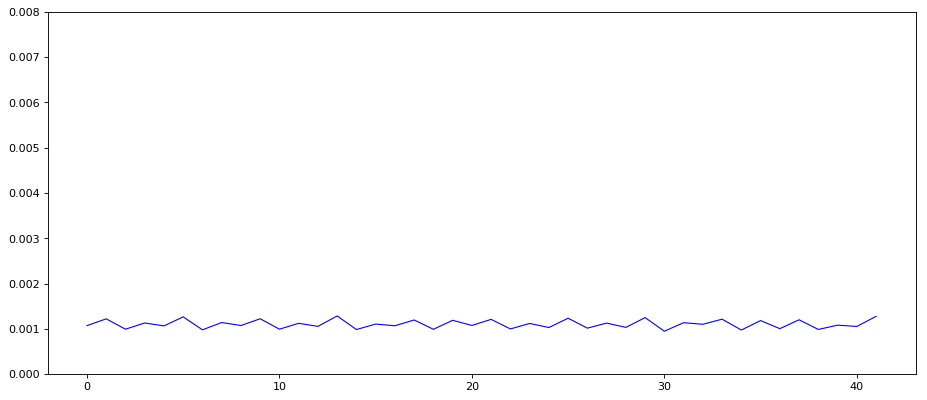

In [0]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(healthy_losses)
plt.ylim(0,0.008)
ax.plot(range(0,size), healthy_losses, '-', color='blue', animated = True, linewidth=1)

In [0]:
#file_ids = spark.sql('select distinct _c1 from df_healhty').rdd.map(lambda row : row._c1).collect()
start = time.time()
for file_id in [105]:
    recording_trimmed = create_trimmed_recording(df_faulty,file_id)
    print("Staring training on %s" % (file_id))
    train(recording_trimmed)
    print("Finished training on %s after %s seconds" % (file_id,time.time()-start))

print("Finished job on after %s seconds" % (time.time()-start))
faulty_losses = lossHistory.losses

Staring training on 105
Train on 1212 samples, validate on 1212 samples
Epoch 1/20
1212/1212 [==============================] - 3s 3ms/step - loss: 0.0073 - val_loss: 0.0059
Epoch 2/20
1212/1212 [==============================] - 3s 2ms/step - loss: 0.0054 - val_loss: 0.0048
Epoch 3/20
1212/1212 [==============================] - 3s 2ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 4/20
1212/1212 [==============================] - 3s 2ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 5/20
1212/1212 [==============================] - 3s 2ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 6/20
1212/1212 [==============================] - 3s 2ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 7/20
1212/1212 [==============================] - 3s 2ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 8/20
1212/1212 [==============================] - 3s 2ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/20
1212/1212 [==============================] - 3s 2ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 10/2

In [0]:
file_ids = pd.unique(df_faulty.iloc[:,1])
start = time.time()
for file_id in file_ids:
    recording_trimmed = create_trimmed_recording(df_faulty,file_id)
    print("Staring training on %s" % (file_id))
    train(recording_trimmed)
    print("Finished training on %s after %s seconds" % (file_id,time.time()-start))

print("Finished job on after %s seconds" % (time.time()-start))
faulty_losses = lossHistory.losses


483903
4839
100
2
Staring training on 98
Train on 4839 samples, validate on 4839 samples
Epoch 1/20
4839/4839 [==============================] - 13s 3ms/step - loss: 4.6685e-04 - val_loss: 4.7908e-04
Epoch 2/20
4839/4839 [==============================] - 13s 3ms/step - loss: 4.5497e-04 - val_loss: 3.5161e-04
Epoch 3/20
4839/4839 [==============================] - 13s 3ms/step - loss: 2.8586e-04 - val_loss: 2.1897e-04
Epoch 4/20
4839/4839 [==============================] - 13s 3ms/step - loss: 3.3602e-04 - val_loss: 3.4138e-04
Epoch 5/20
4839/4839 [==============================] - 13s 3ms/step - loss: 3.3868e-04 - val_loss: 3.4226e-04
Epoch 6/20
4839/4839 [==============================] - 13s 3ms/step - loss: 3.3224e-04 - val_loss: 3.3069e-04
Epoch 7/20
4839/4839 [==============================] - 13s 3ms/step - loss: 3.2632e-04 - val_loss: 3.2423e-04
Epoch 8/20
4839/4839 [==============================] - 13s 3ms/step - loss: 3.2103e-04 - val_loss: 3.1341e-04
Epoch 9/20
4839/4839 [=

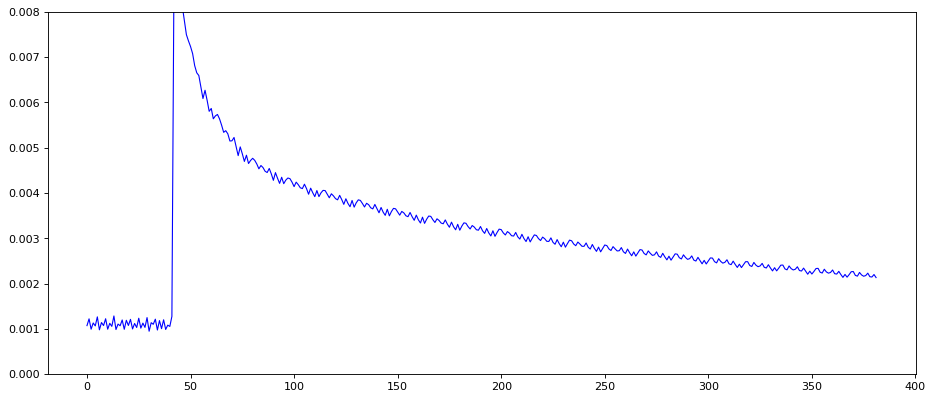

In [0]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(healthy_losses+faulty_losses)
plt.ylim(0,0.008)
ax.plot(range(0,size), healthy_losses+faulty_losses, '-', color='blue', animated = True, linewidth=1)